In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
from bs4 import BeautifulSoup as bs
import re

In [6]:
def strip_html(text):
    soup=bs(text,'html.parser')
    return soup.get_text()
def remove_sqr_brckts(text):
    return re.sub('\[[^]]*\]','',text)
def noisy_text(text):
    text=strip_html(text)
    text=remove_sqr_brckts(text)
    return text


In [7]:
df['review']=df['review'].apply(noisy_text)


In [8]:
def re_special(text,remove_digits=True):
    p=r'[^a-zA-Z0-9\s]'
    text=re.sub(p,'',text)
    return text
df['review']=df['review'].apply(re_special)

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
lb=LabelBinarizer()
df['sentiment']=lb.fit_transform(df['sentiment'])

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tech...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


In [12]:
train_sentiment=df.sentiment[:40000]
train_review=df.review[:40000]
test_sentiment=df.sentiment[40000:]
test_review=df.review[40000:]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tf_vec=TfidfVectorizer(min_df=20,max_df=0.5,ngram_range=(1,2))

In [15]:
cv_train_review=tf_vec.fit_transform(train_review)
cv_test_review=tf_vec.transform(test_review)

In [16]:
cv_train_review.shape,cv_test_review.shape

((40000, 60355), (10000, 60355))

In [17]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR()

In [18]:
model=lr.fit(cv_train_review,train_sentiment)
model.score(cv_train_review,train_sentiment)

0.94555

In [19]:
p=model.predict(cv_test_review)

In [20]:
model.score(cv_test_review,test_sentiment)

0.9029

In [21]:
act=test_sentiment

In [22]:
from sklearn.metrics import *
import matplotlib.pyplot as plt


In [23]:
confusion_matrix(act,p)

array([[4477,  516],
       [ 455, 4552]], dtype=int64)

In [24]:
accuracy_score(act,p)

0.9029

In [25]:
print(classification_report(act,p))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4993
           1       0.90      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [26]:
f_c={
    word: coef for word,coef in zip(tf_vec.get_feature_names(),model.coef_[0])
}
k=sorted(f_c.items(),key=lambda x:x[1],reverse=True)[:5]
for b_p in k:
    print(b_p)



('great', 8.44837710508782)
('excellent', 6.376604002862087)
('perfect', 5.10445832539627)
('wonderful', 5.089755923867141)
('the best', 4.4962217804800755)


In [27]:
for b_n in sorted(
    f_c.items(), 
    key=lambda x: x[1])[:5]:
    print (b_n)
    

('bad', -9.240977113070768)
('worst', -8.44302173115969)
('awful', -7.046399252649115)
('the worst', -6.728980080185564)
('boring', -6.344153770061691)


In [28]:
p_w=' '
k=sorted(f_c.items(),key=lambda x:x[1],reverse=True)[:100]

for b_p in k:
    p_w+=str(b_p)
n_w=' '
for b_n in sorted(f_c.items(),key=lambda x: x[1])[:100]:
    n_w+=str(b_n)


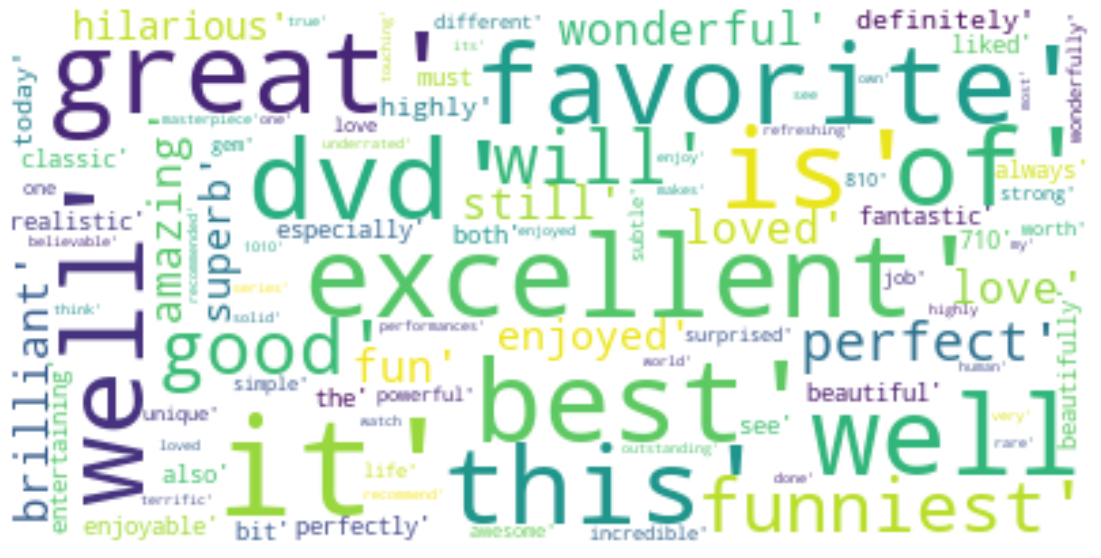

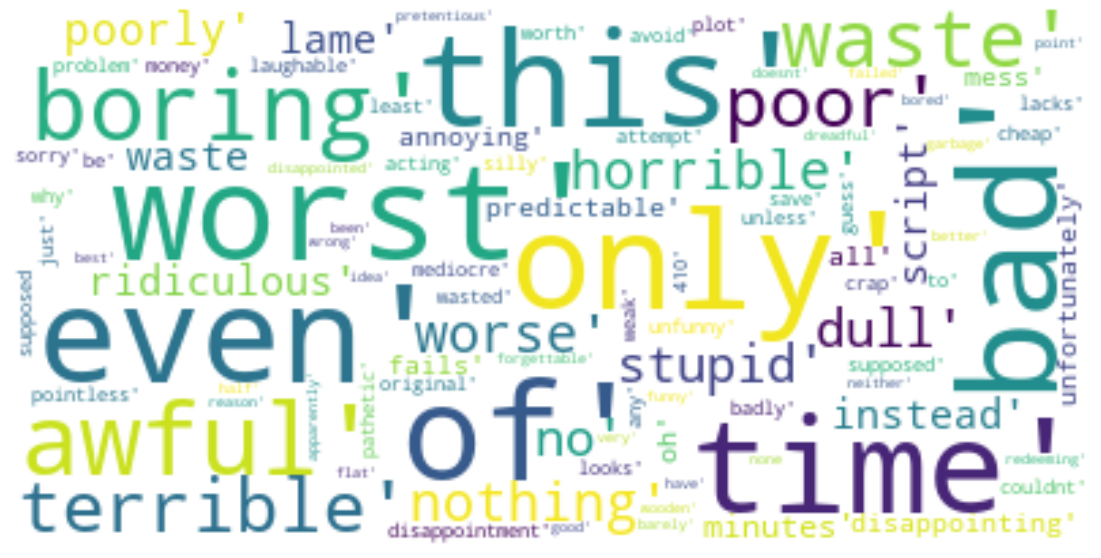

In [29]:
from wordcloud import *
wc=WordCloud(max_font_size=50,max_words=100,background_color='white').generate(p_w)
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
wc=WordCloud(max_font_size=50,max_words=100,background_color='white').generate(n_w)
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()